## BUSINESS PROBLEM
#### Connectel a leading telecommunications company providing a wide range of services including phone, internet, and TV streaming to a diverse customer base wants to;
1. Gain insights into the factors that contribute to customer churn and develop strategies 
2. To improve customer retention.

## OBJECTIVE

#### The objective is to perform data cleaning and exploratory data analysis (EDA) on the provided dataset to understand how various features relate to the target feature, CHURN. This analysis will help identify key factors influencing churn and provide actionable insights for Connectel to enhance customer retention strategies.

## CODE FLOW
 ------------------------------------------------------------------
 1. Import Libraries.
 ------------------------------------------------------------------
 2. Load Dataset.
 ------------------------------------------------------------------
 3. Data Cleaning.
 
 - Investigate Dataset for Anomalies and Data Types.
 - Investigate missing value.
 - Drop Irrelevant Feature.
 - Convert Senior Citizen to Categorical Feature
 - Convert Churn to Numerical Feature
 ------------------------------------------------------------------
 4. Final Cleaned Data for EDA.
 - Numerical Statistical Analysis.
 - Categorical Statistical Analysis.
 ------------------------------------------------------------------
 5. Exploratory Data Analysis.
 - Numerical Features (Univariate Analysis).
 - Numerical Features (Bi-variate Analysis).
 - Numerical Features (Multivariate Analysis).
  ------------------------------------------------------------------
 - Categorical Features (Univariate Analysis)
 - Categorical Features (Bi-variate Analysis)
 - Categorical Features (Multivariate Analysis)
 ------------------------------------------------------------------

# Import Libraries

In [53]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
cust_churn_data = pd.read_csv('Customer-Churn - Customer-Churn.csv')

In [3]:
cust_churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust_churn_data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


## DATA CLEANING

### Investigate the dataset for anomalies and data types

In [5]:
# Dimensionality of the Data - The number of rows and columns
cust_churn_data.shape

(7043, 21)

In [6]:
# Examine the Columns/Features of the Data
cust_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Get the data information/types
cust_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Numerical Statistical Analysis
cust_churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
# Categorical Statistical Analysis
cust_churn_data.describe(include = ['object', 'bool']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Dealing with missing value

In [10]:
# Investigate the missing values
null_vals = cust_churn_data.isnull().sum()
null_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

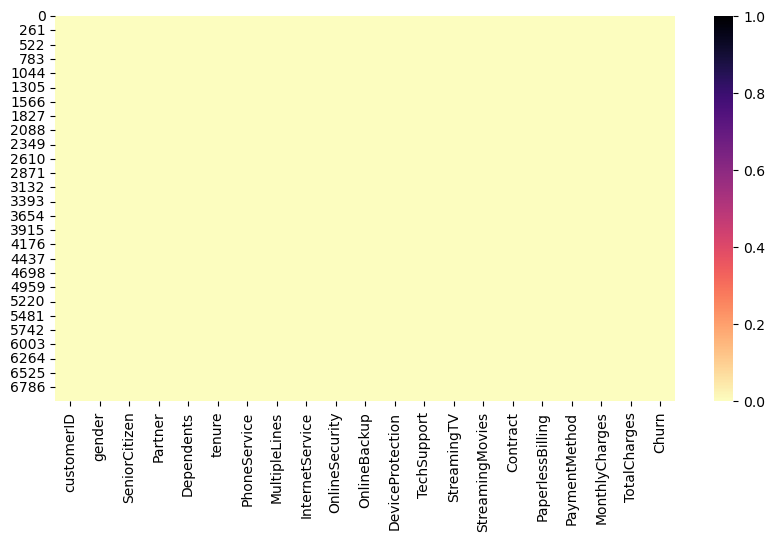

In [12]:
# Using Heatmap Visualization to check for missing value
plt.figure(figsize = (10, 5))
sns.heatmap(data = cust_churn_data.isnull(), cmap = 'magma_r', cbar = True, vmin = 0, vmax = 1)

plt.show();

In [13]:
# Display where the missing values exist
cust_churn_data[cust_churn_data.isnull().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
# Get the median of the Column (TC - Total Charges) with missing values
tc_median_value = cust_churn_data['TotalCharges'].median()
tc_median_value

1397.475

In [15]:
# Replace the missing values with median using .fillna Method
cust_churn_data['TotalCharges'].fillna(tc_median_value, inplace = True)
cust_churn_data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [16]:
cust_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Drop irrelevant columns
cust_churn_data = cust_churn_data.drop(['customerID'], axis = 1)
cust_churn_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert SeniorCitizen to Categorical Feature
- Since SeniorCitizen is a binary feature, converting it to a categorical feature allows for straightforward analysis of its impact on churn by comparing the two groups directly.

In [18]:
cust_churn_data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [19]:
# Convert using .astype Method

cust_churn_data['SeniorCitizen'] = cust_churn_data['SeniorCitizen'].astype('object')
cust_churn_data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object

### Convert Churn to Numerical Feature
- Converting Churn to numerical features will help to identify how the numerical features associate with Churn

In [20]:
cust_churn_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [21]:
# Convert using the .replace Method
cust_churn_data['Churn'] = cust_churn_data['Churn'].replace({'Yes': 1, 'No': 0})
cust_churn_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Final Cleaned Customer Churn Dataset for EDA

In [22]:
cust_churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [23]:
# Updated Dataset info
cust_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
# Updated Numerical Statistical Analysis
cust_churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


In [25]:
# Updated Categorical Statistical Analysis
cust_churn_data.describe(include = ['object', 'bool']).T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# EXPLORATORY DATA ANALYSIS

## DISTRIBUTION OF NUMERICAL FEATURES

### Univariate Analysis
###### To investigate independent Numerical Features

In [26]:
# Get the Numerical columns in the dataset
numerical_df = cust_churn_data.select_dtypes(exclude = 'object')
numerical_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


In [27]:
# Create a list for the Numerical Columns
numerical_cols = numerical_df.columns.to_list()
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

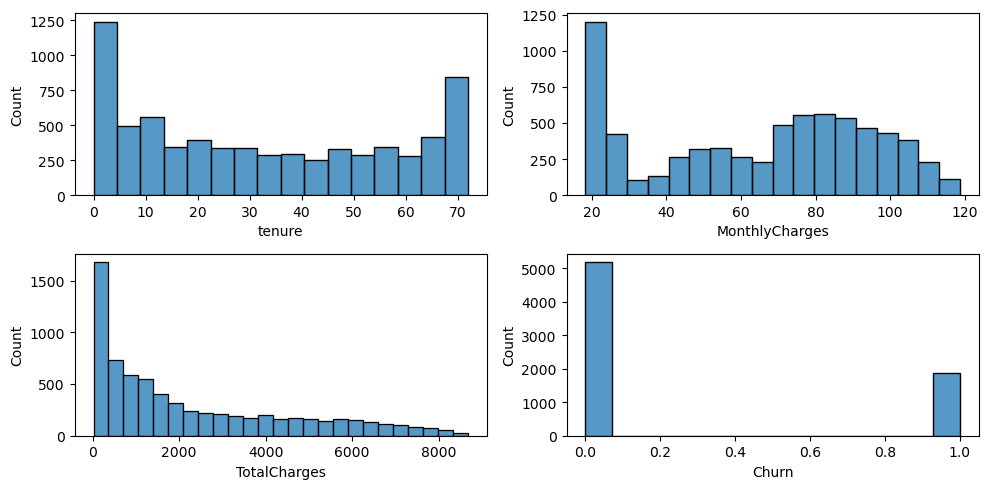

In [28]:
# Subplot to Visualize the Histogram for distribution of the individual numerical features
n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1) // num_cols

fig, axs = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (10,5))
position = axs.flatten()

for index, feature in enumerate(numerical_cols):
    sns.histplot(data = cust_churn_data[feature], ax = position[index])
    
plt.tight_layout()

In [ ]:
# Subplot to Visualize the Boxplot for distribution of the individual numerical features

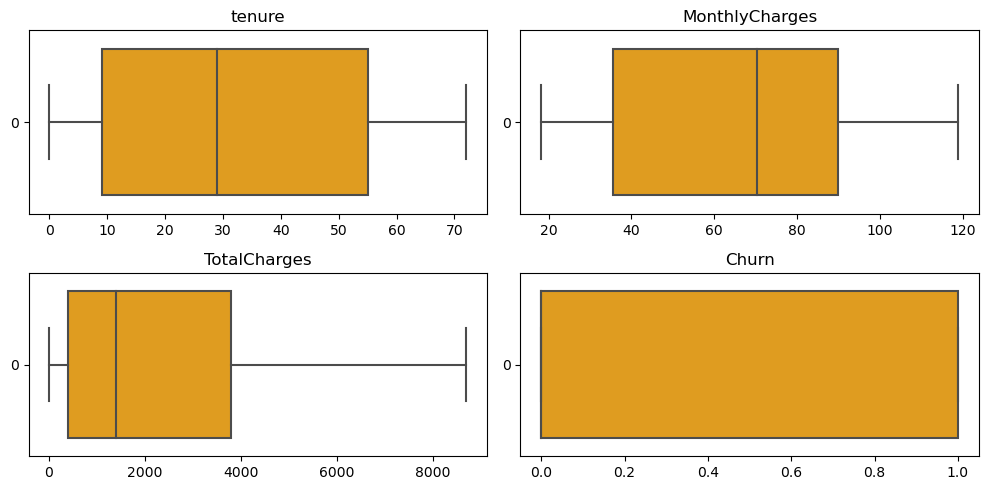

In [29]:
n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1) // num_cols

fig, axs = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (10,5))
position = axs.flatten()

for index, feature in enumerate(numerical_cols):
    sns.boxplot(data = cust_churn_data[feature], ax = position[index], orient = 'h', color = 'orange')
    position[index].set_title(feature)
    
plt.tight_layout()

### Bi-variate Analysis

###### To explore the relationship between independent numerical features and target feature 'CHURN'
1. Hisplot
2. Boxplot
3. Violinplot
4. Scatterplot

In [30]:
# List of numerical columns
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

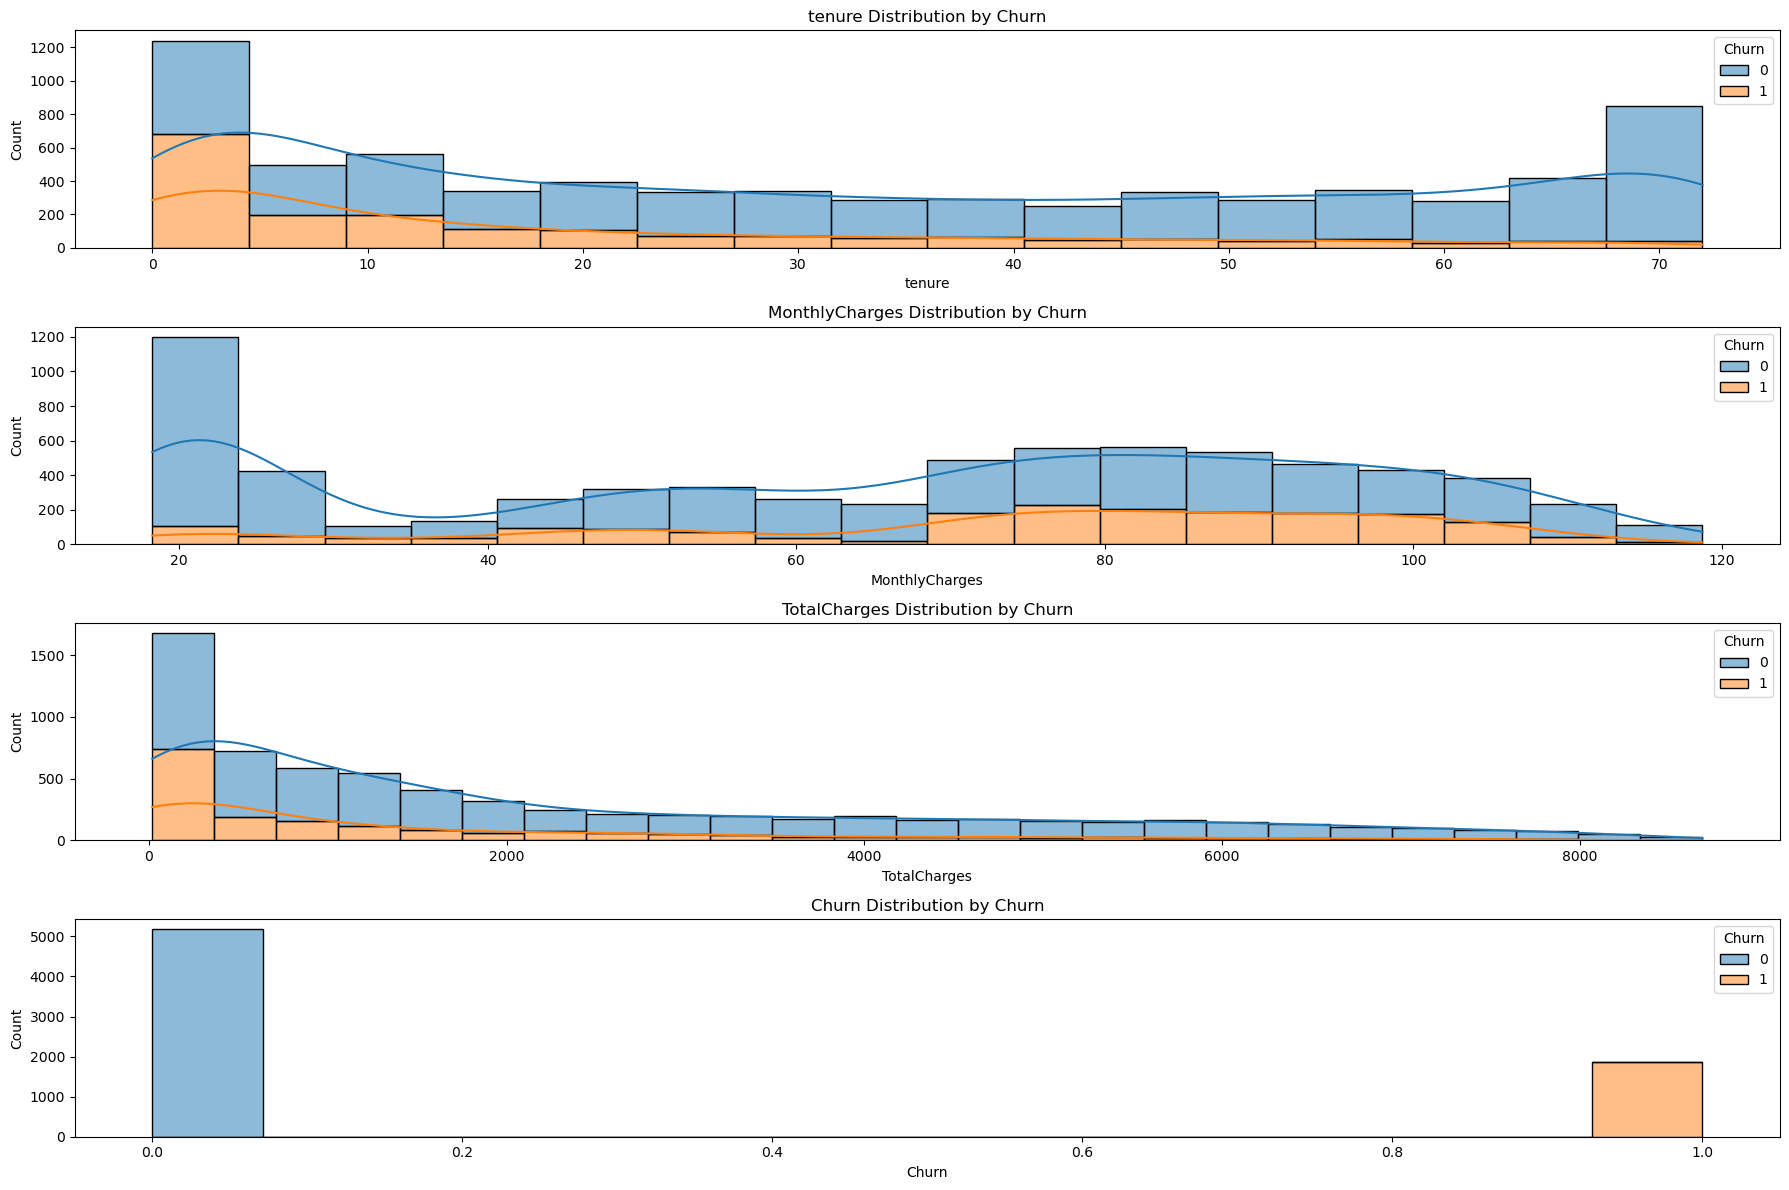

In [31]:
# Ploting Histograms for the numerical features 
## To see the distribution for churned and non churned customers
plt.figure(figsize = (18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 1, i)
    sns.histplot(data = cust_churn_data, x = col, hue = 'Churn', multiple = 'stack', kde = True)
    plt.title(f"{col} Distribution by Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()

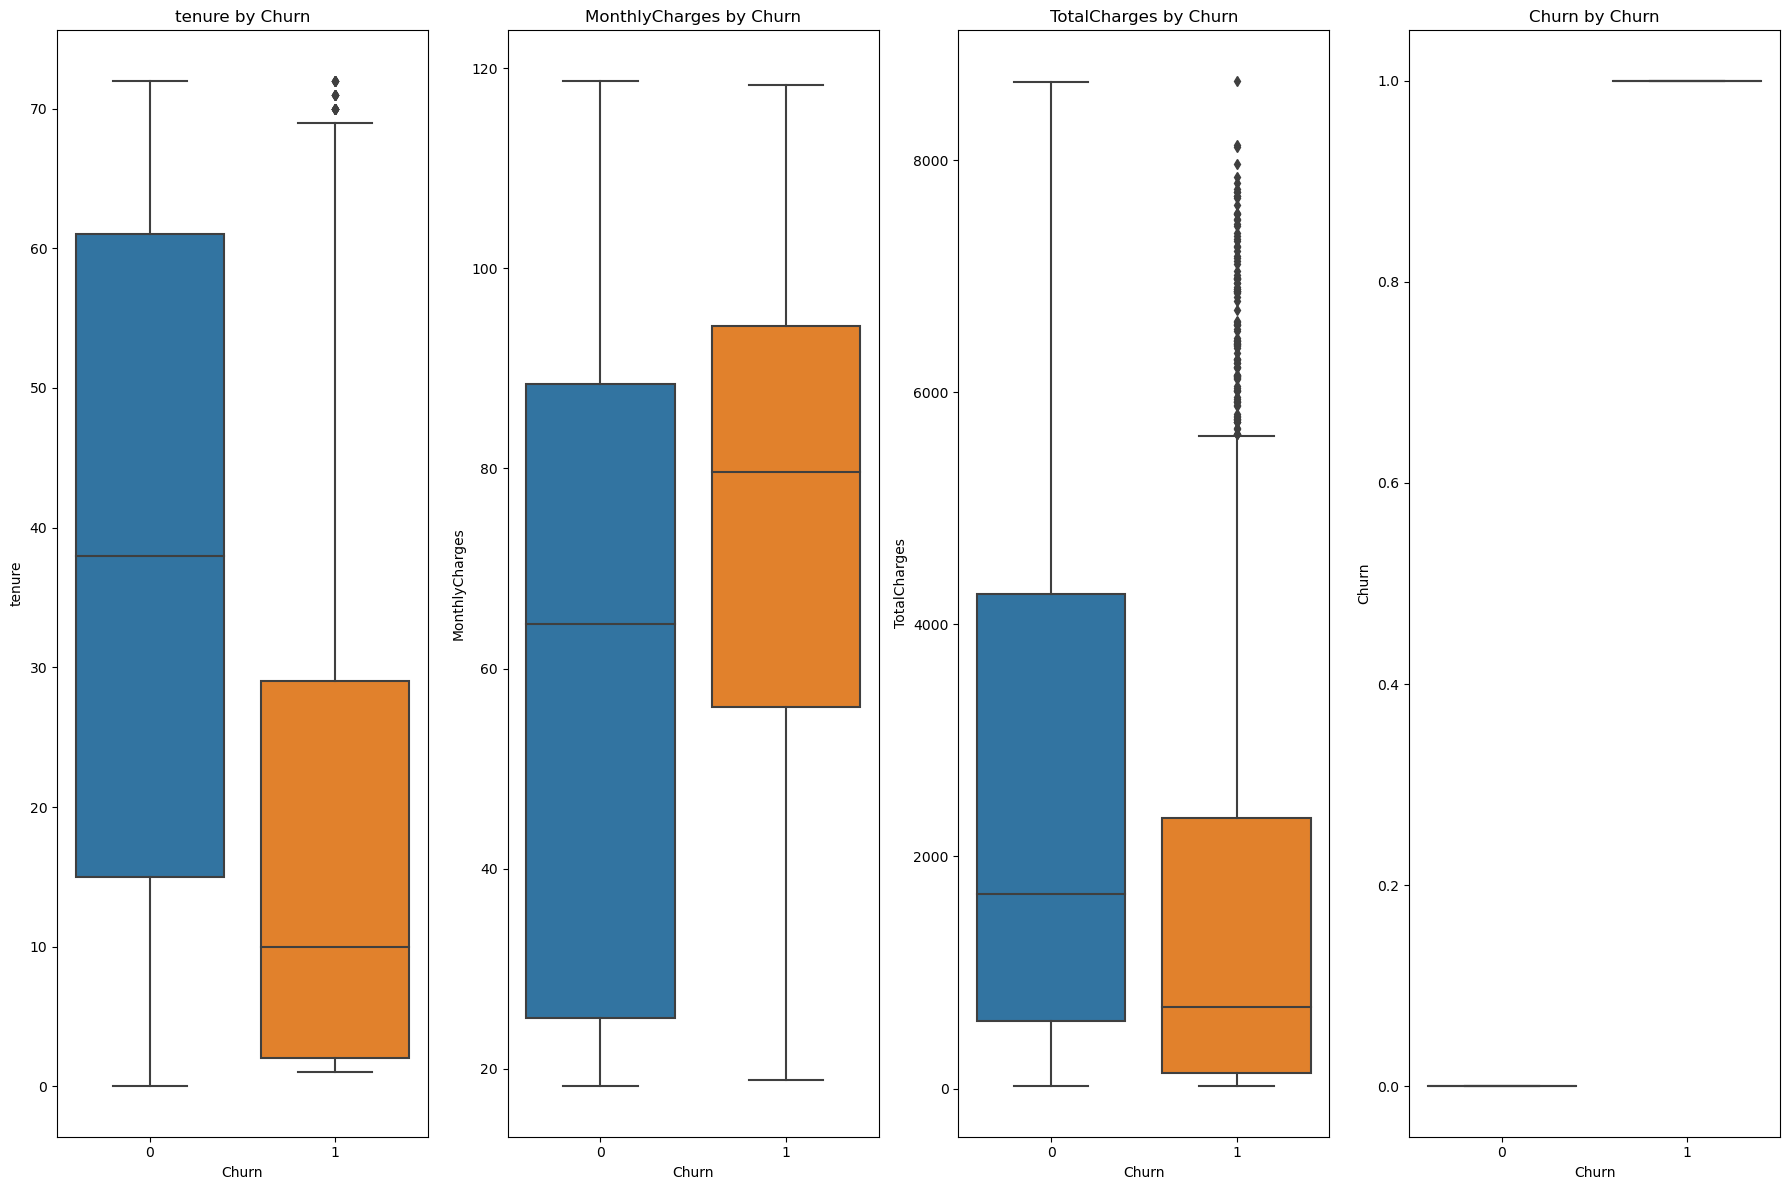

In [33]:
# Ploting Box Plot for the numerical features
## To compare the distribution accross the churned and non churned customers
plt.figure(figsize = (18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x = 'Churn', y = col, data = cust_churn_data)
    plt.title(f"{col} by Churn")
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout();

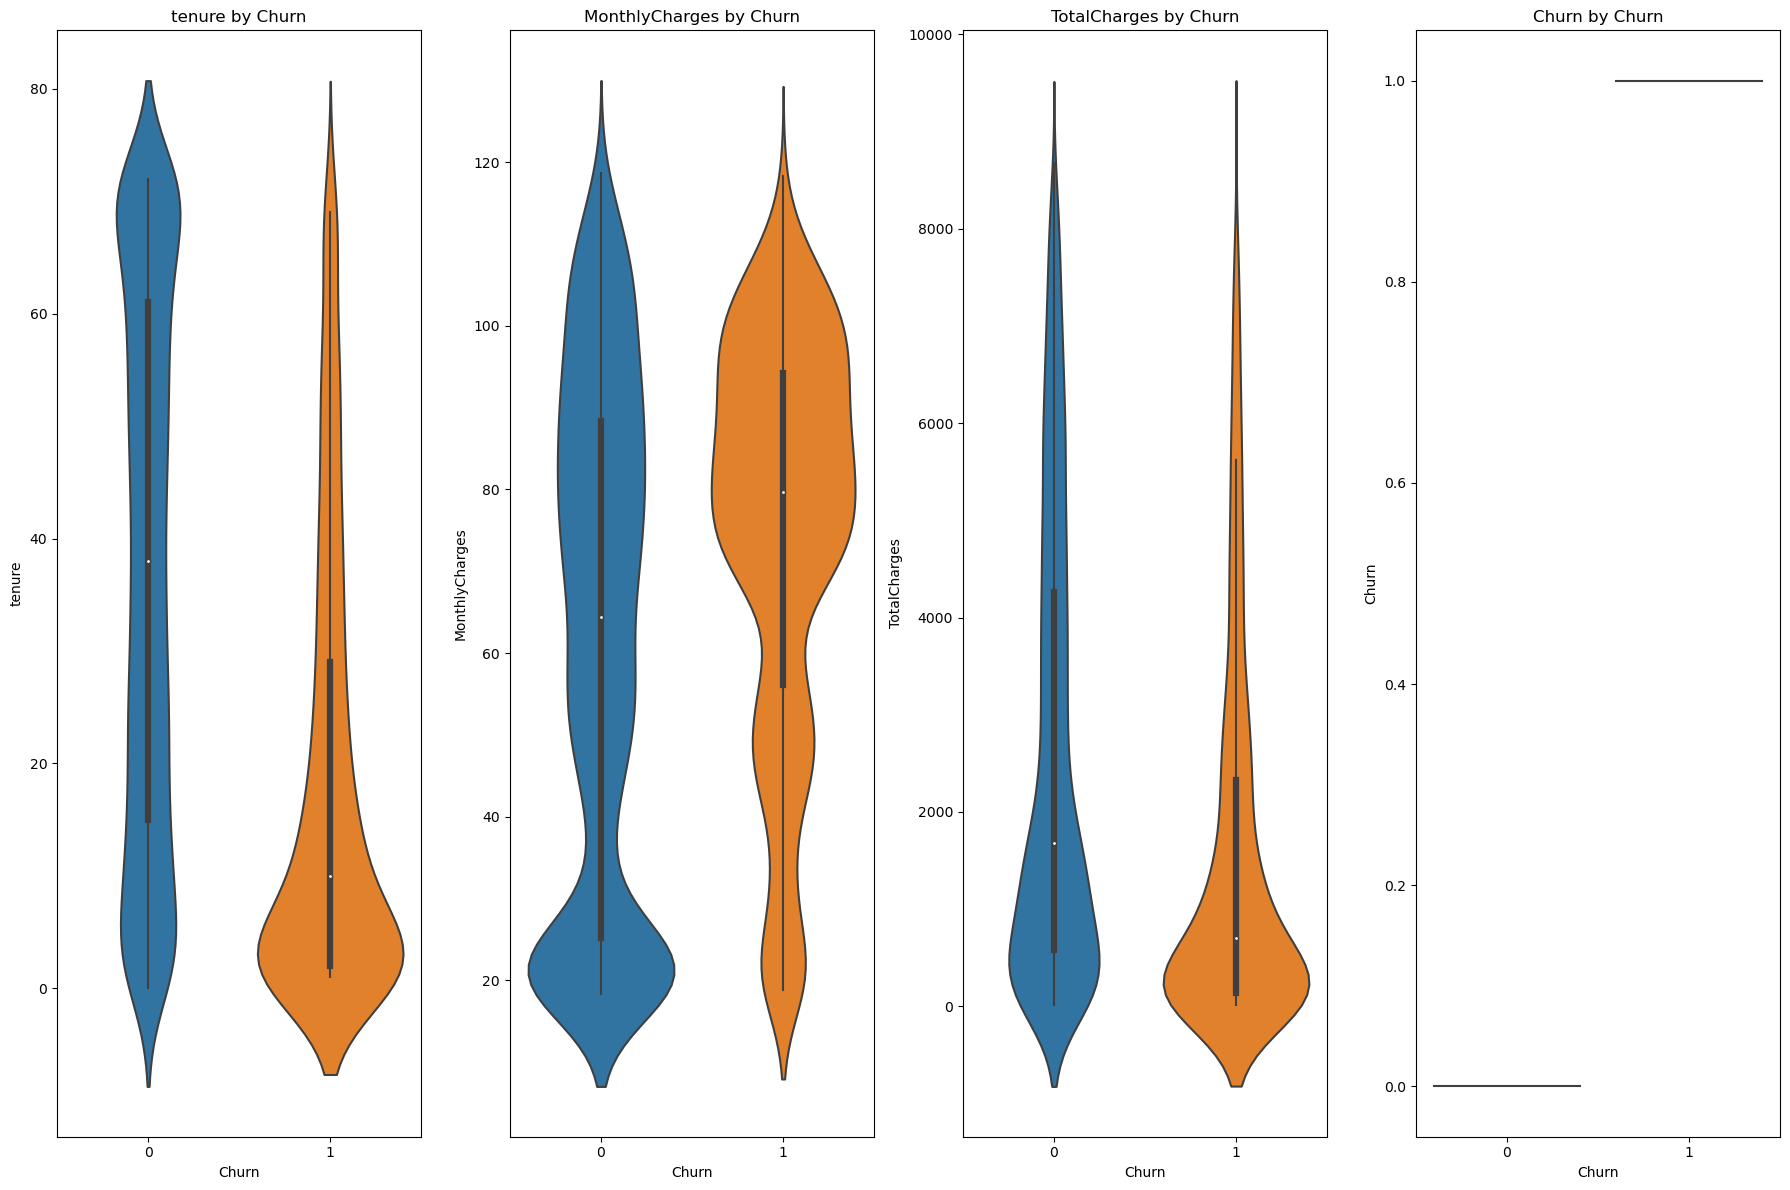

In [34]:
# Ploting Violin Plots for the numerical features
## This shows the density of the distribution accross the churned and non churned customers.
plt.figure(figsize = (18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(x = 'Churn', y = col, data = cust_churn_data, split = True)
    plt.title(f"{col} by Churn")
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout();

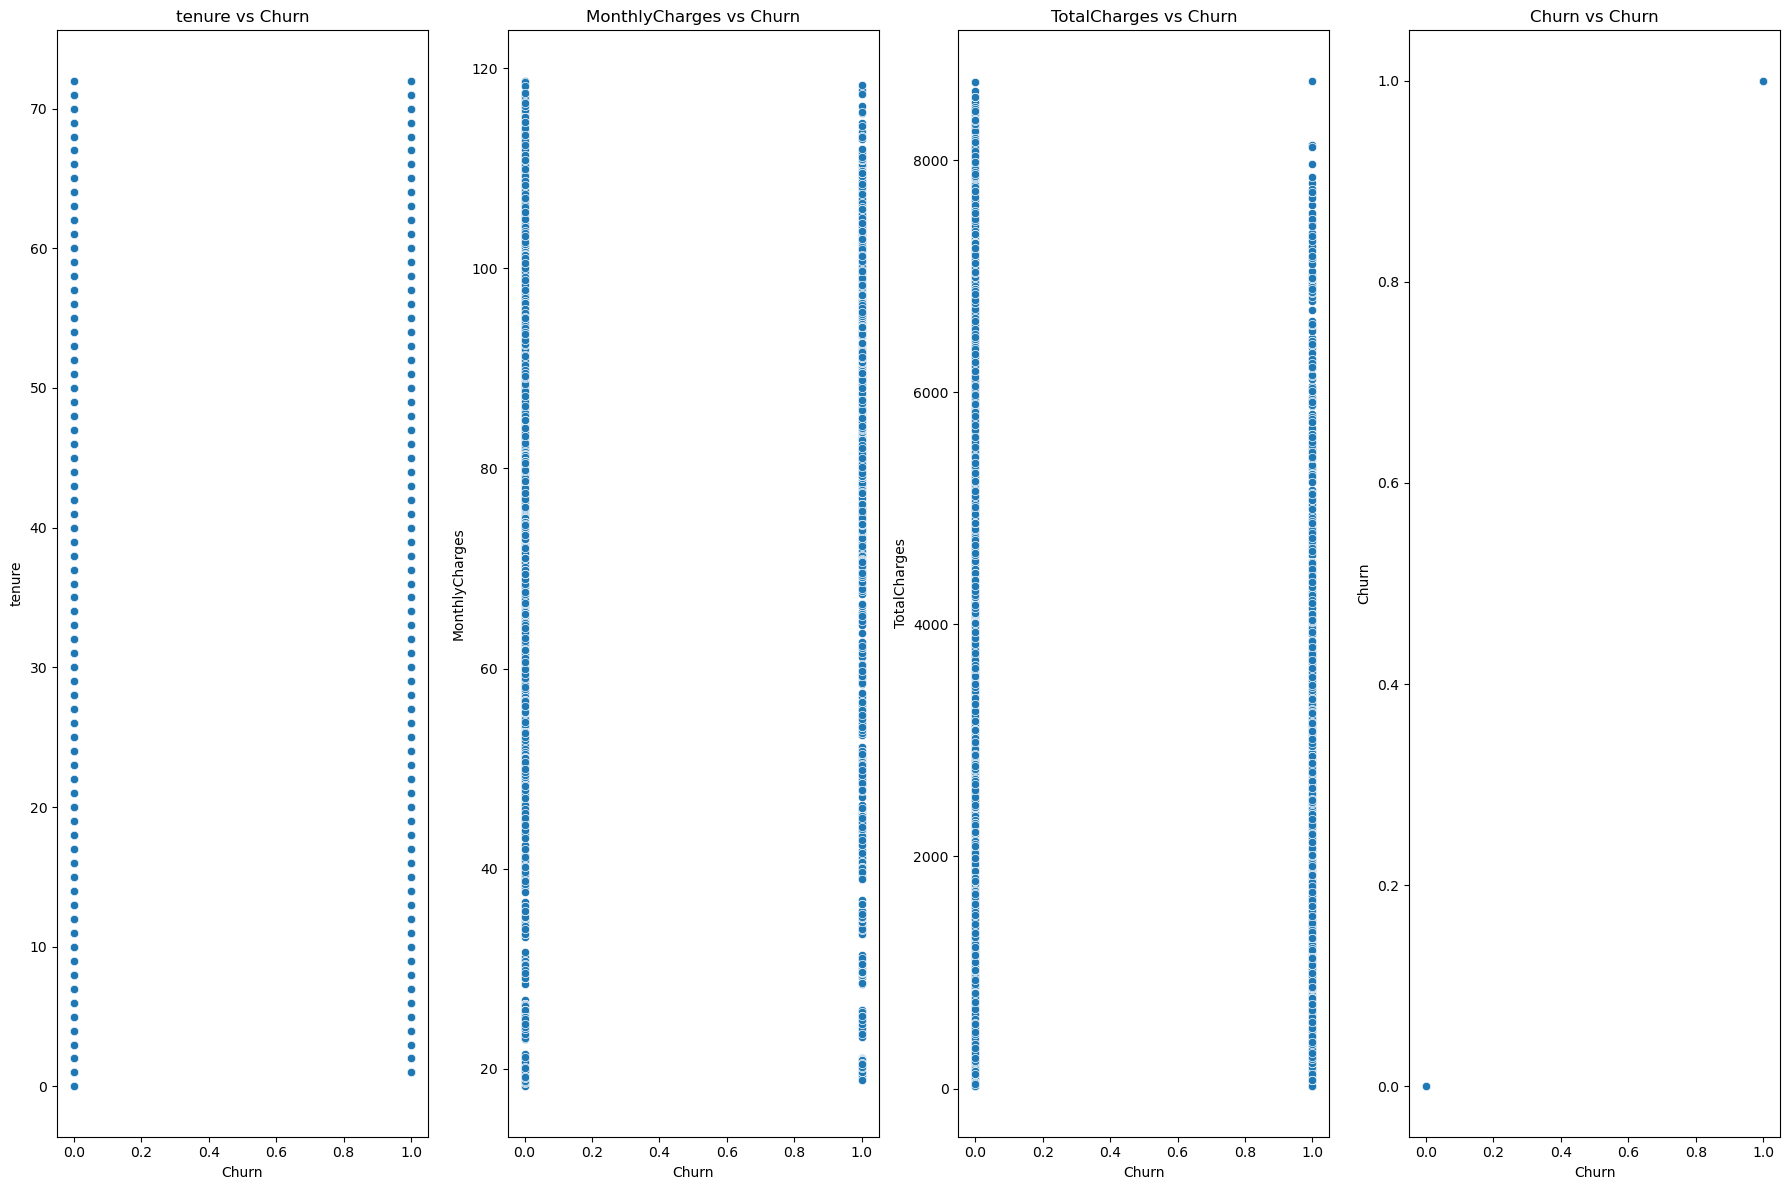

In [35]:
# Ploting Scatter Plot for the numerical features
## Tp visualize the relationship between the numerical features and churn
plt.figure(figsize = (18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(x = 'Churn', y = col, data = cust_churn_data)
    plt.title(f"{col} vs Churn")
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout();

### Multivariate Analysis

###### Involves examing multiple features to understand the relationship between them and To identify patterns and interactions that may infuence churn.
1. Correlation Matrix
2. Heatmap Correlation Matrix
3. Pairplot

In [36]:
# Numerical_data Correlation
cust_churn_data.corr(numeric_only = True)

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
Churn,-0.352229,0.193356,-0.199037,1.000000


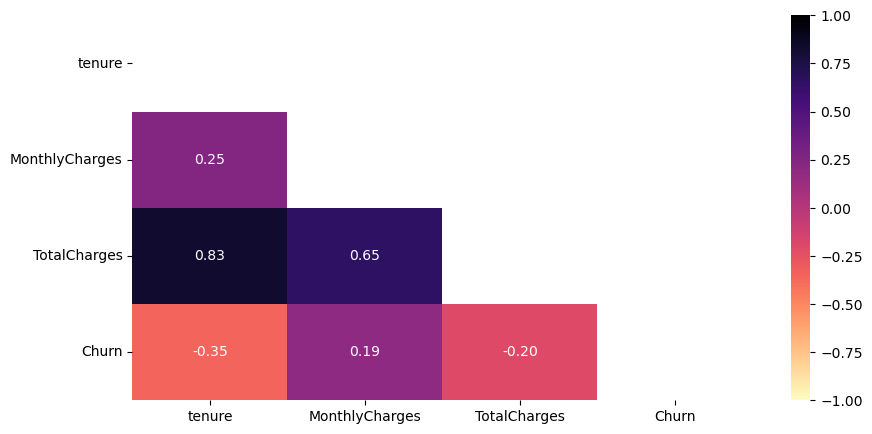

In [38]:
# Creating Heatmap to Visualize the Numerical Data Correlation
my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))

plt.figure(figsize = (10, 5))
sns.heatmap(data = numerical_df.corr(), cmap = 'magma_r', vmin = -1, vmax = 1, fmt ='.2f', annot = True, mask = my_mask);

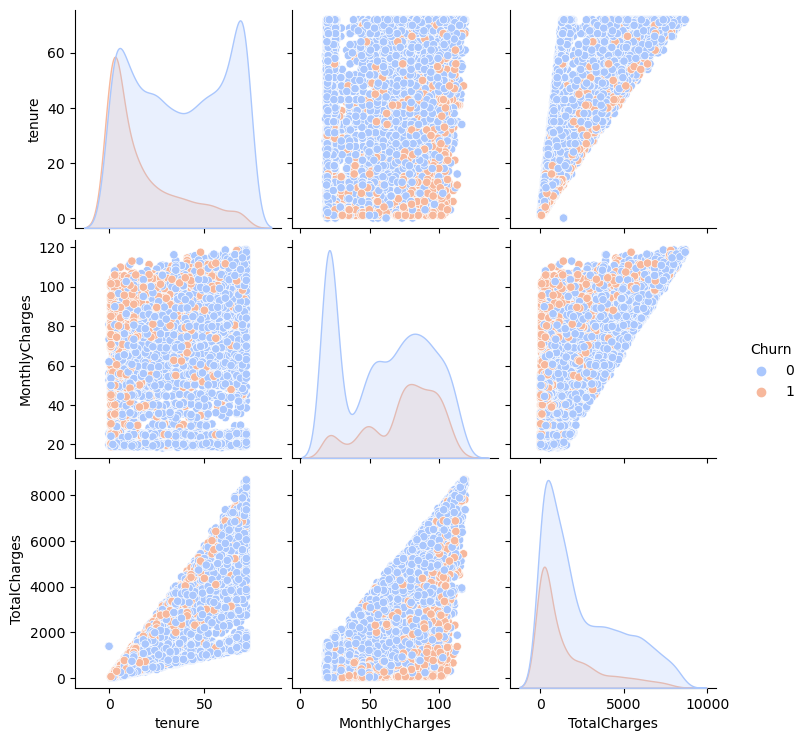

In [54]:
#  Using Pairplot to display scatterplots for independent numerical features and how they relate to Churn

sns.pairplot(cust_churn_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue = 'Churn', palette = 'coolwarm');

## CATEGORICAL FEATURES ANALYSIS

In [40]:
# Get the Categorical columns in the dataset
categorical_df = cust_churn_data.select_dtypes(include = 'object')
categorical_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [41]:
# Create a list for the Categorical Columns
cat_columns = categorical_df.columns.to_list()
cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [42]:
c_features = len(cat_columns)
c_features

16

### Univariate Analysis
###### To investigate Independent Categorical Features
1. Get number of unique data.
2. Calculate the Categorical Features Frequencies.
3. Use Barplot for visualization.

In [43]:
# Get the number of unique data in the categorical_columns_list

for feature in cat_columns:
    print(f"{feature} -------------->>> {cust_churn_data[feature].nunique()}")

gender -------------->>> 2
SeniorCitizen -------------->>> 2
Partner -------------->>> 2
Dependents -------------->>> 2
PhoneService -------------->>> 2
MultipleLines -------------->>> 3
InternetService -------------->>> 3
OnlineSecurity -------------->>> 3
OnlineBackup -------------->>> 3
DeviceProtection -------------->>> 3
TechSupport -------------->>> 3
StreamingTV -------------->>> 3
StreamingMovies -------------->>> 3
Contract -------------->>> 3
PaperlessBilling -------------->>> 2
PaymentMethod -------------->>> 4


In [44]:
# Calculate the Individual Categorical Features Frequencies using for loop

cat_frequencies = {}

for col in cat_columns:
    cat_frequencies[col] = cust_churn_data[col].value_counts()

for col, freq in cat_frequencies.items():
    print(f"Frequencies for {col}: \n{freq}\n")

Frequencies for gender: 
gender
Male      3555
Female    3488
Name: count, dtype: int64

Frequencies for SeniorCitizen: 
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Frequencies for Partner: 
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Frequencies for Dependents: 
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Frequencies for PhoneService: 
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Frequencies for MultipleLines: 
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Frequencies for InternetService: 
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Frequencies for OnlineSecurity: 
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Frequencies for OnlineBackup: 
OnlineBackup
No                     3088
Yes                    2429
No 

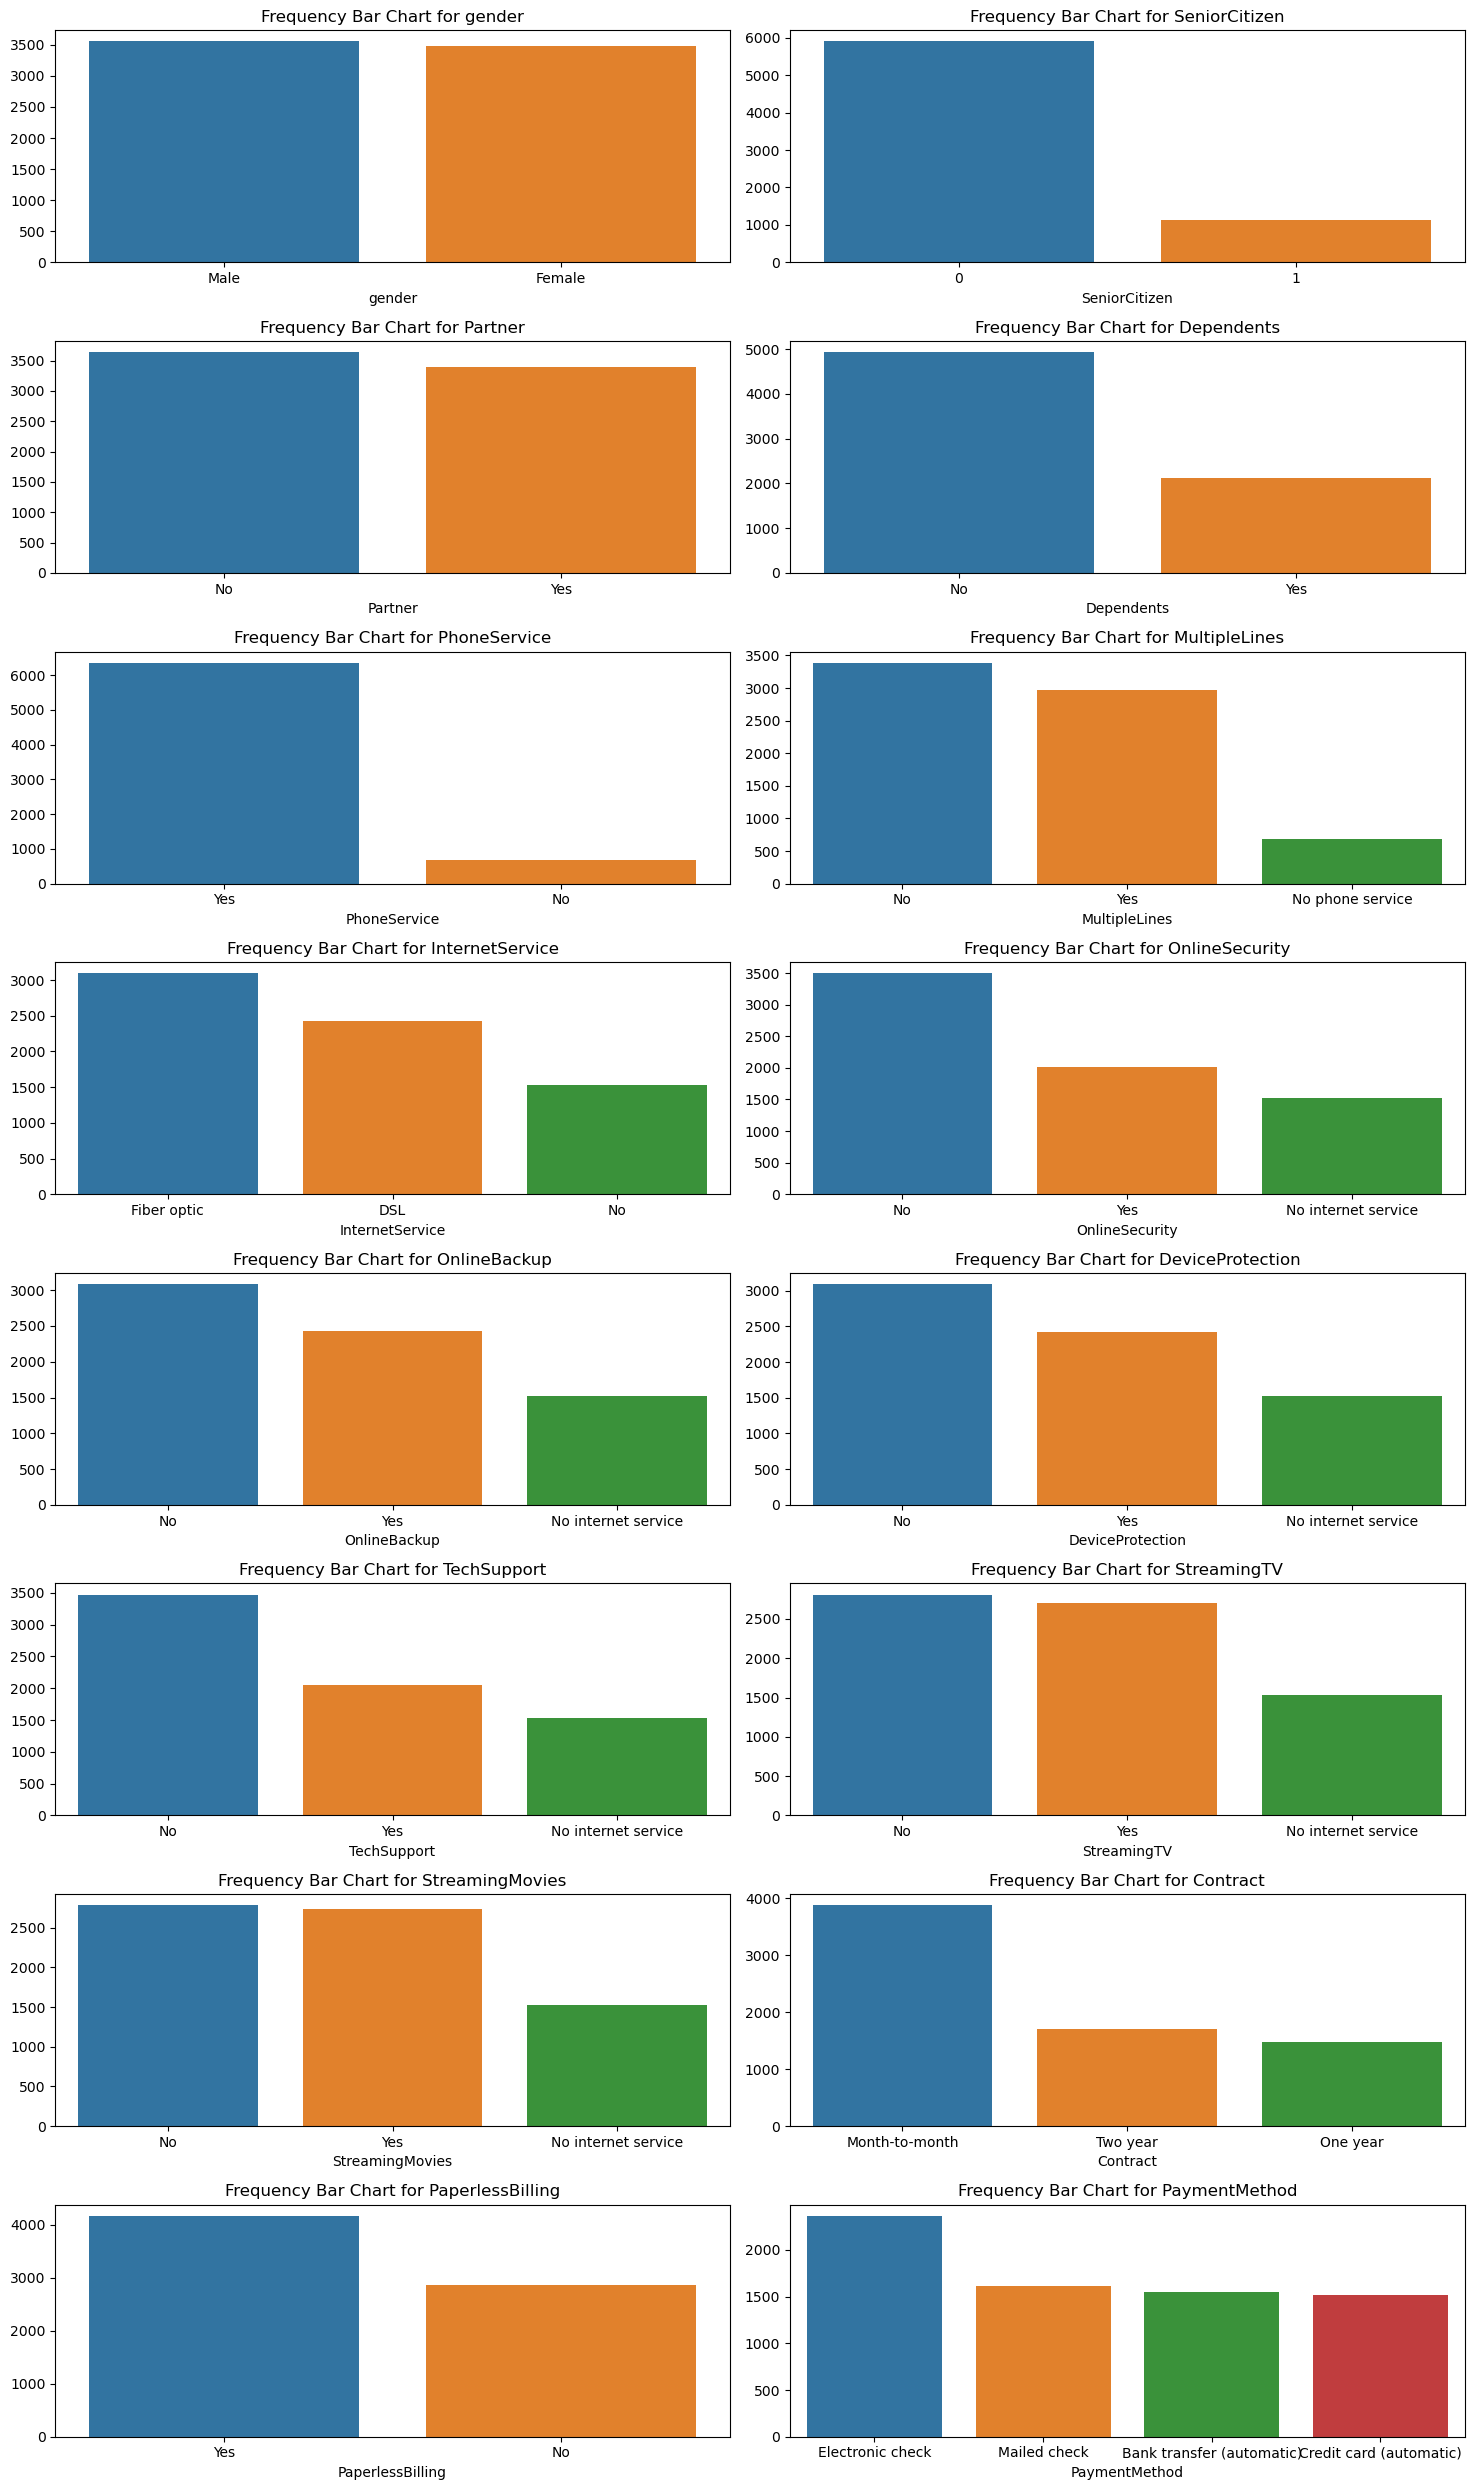

In [45]:
# Using Bar plots to visualize the frequencies of the categorical features (univariate analysis)

fig, axs = plt.subplots(8, 2, figsize = (15,25))
position = axs.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = cust_churn_data[feature].value_counts().index, 
                y = cust_churn_data[feature].value_counts().values, 
                ax = position[index])
    
    position[index].set_title(f"Frequency Bar Chart for {feature}")

plt.tight_layout();

### Bi-variate Analysis

##### Compare independent features and target feature CHURN
1. Extact the Categorical features info
2. Count plot to visuaize the Independent Categorical Features and Churn

In [46]:
# Extract Categorical Features
categorical_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [47]:
cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [331]:
# Count plot to visuaize the Independent Categorical Features vs Churn

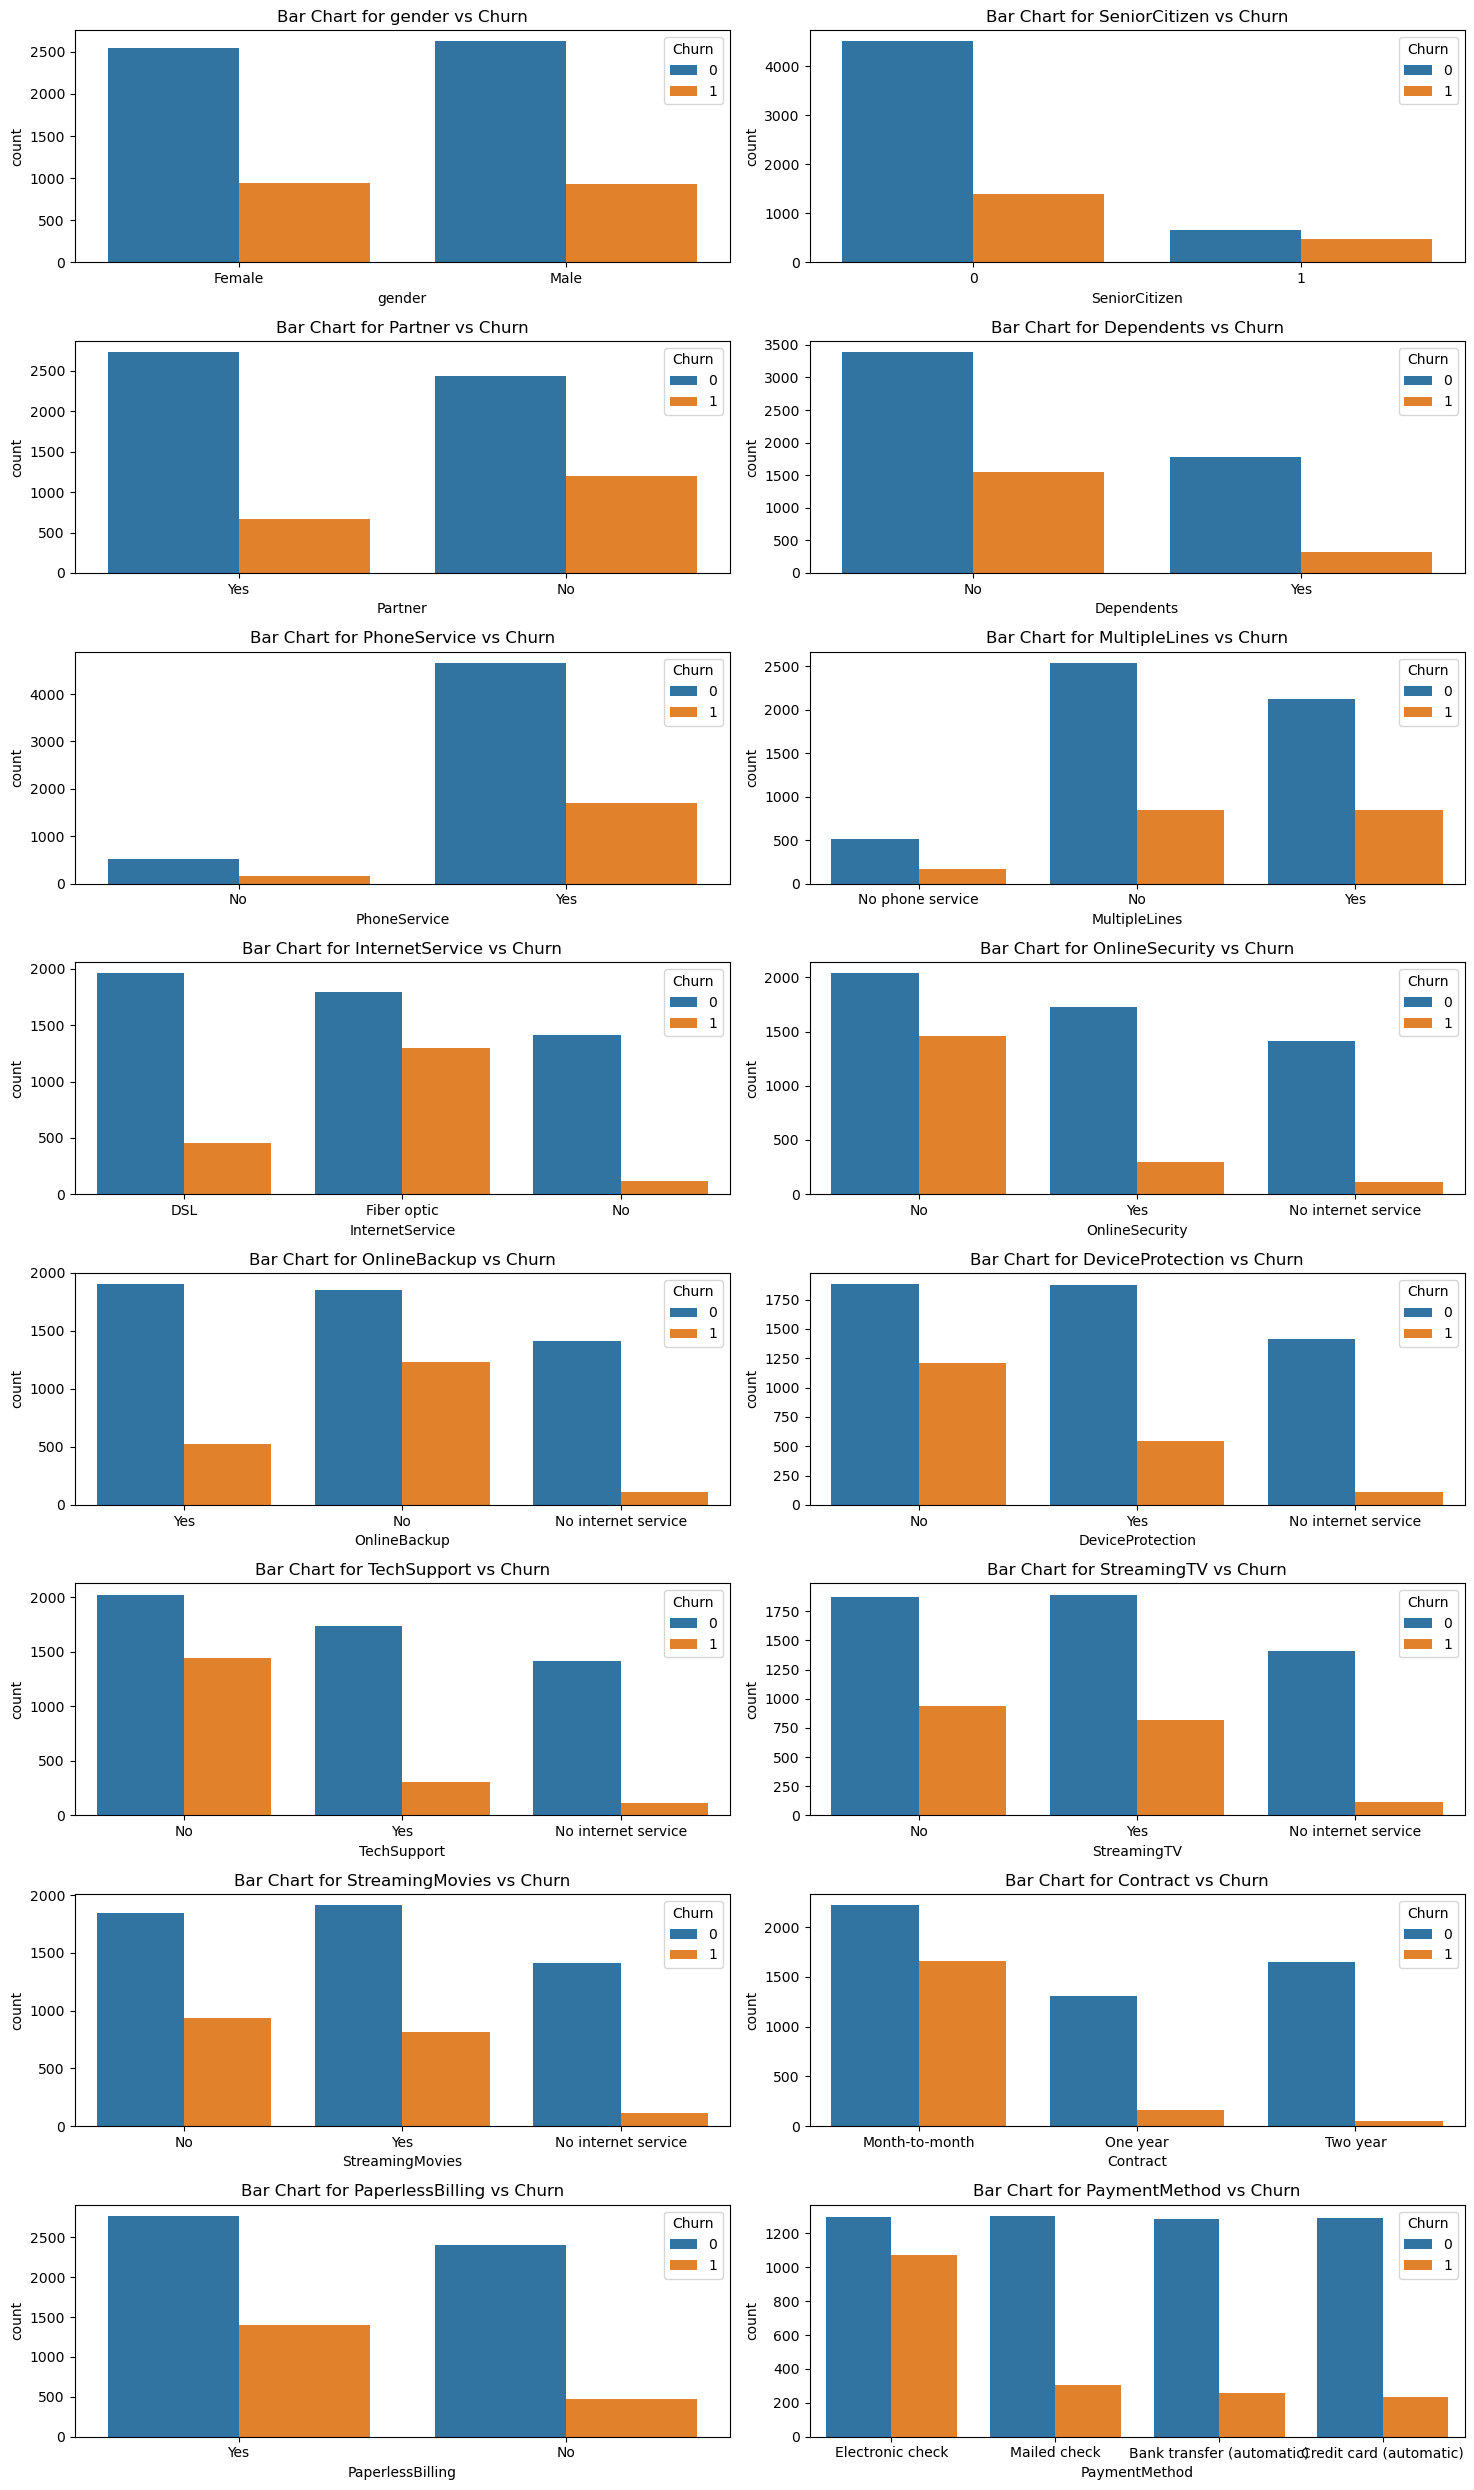

In [49]:
fig, axs = plt.subplots(nrows = 8, ncols = 2, figsize = (15,25))

position2 = axs.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x = feature, hue = cust_churn_data['Churn'], ax = position2[index])
    position2[index].set_title(f"Bar Chart for {feature} vs Churn")
    
plt.tight_layout();

### Multivariate Analysis
###### To analyze the relationship between two or more features and the target feature CHURN

In [50]:
cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [51]:
# Function to plot Multivariate Analysis

def plot_multivariate_categorical(cust_churn_data, feature1, feature2, target = 'Churn'):
    plt.figure(figsize = (15, 25))
    sns.catplot(x = feature1, hue = feature2, col = target, data = cust_churn_data,
               kind = 'count', height = 5, aspect = 1.5, palette = 'coolwarm')
    plt.title(f"{feature1} and {feature2} vs {target}")
    plt.show()

<Figure size 1500x2500 with 0 Axes>

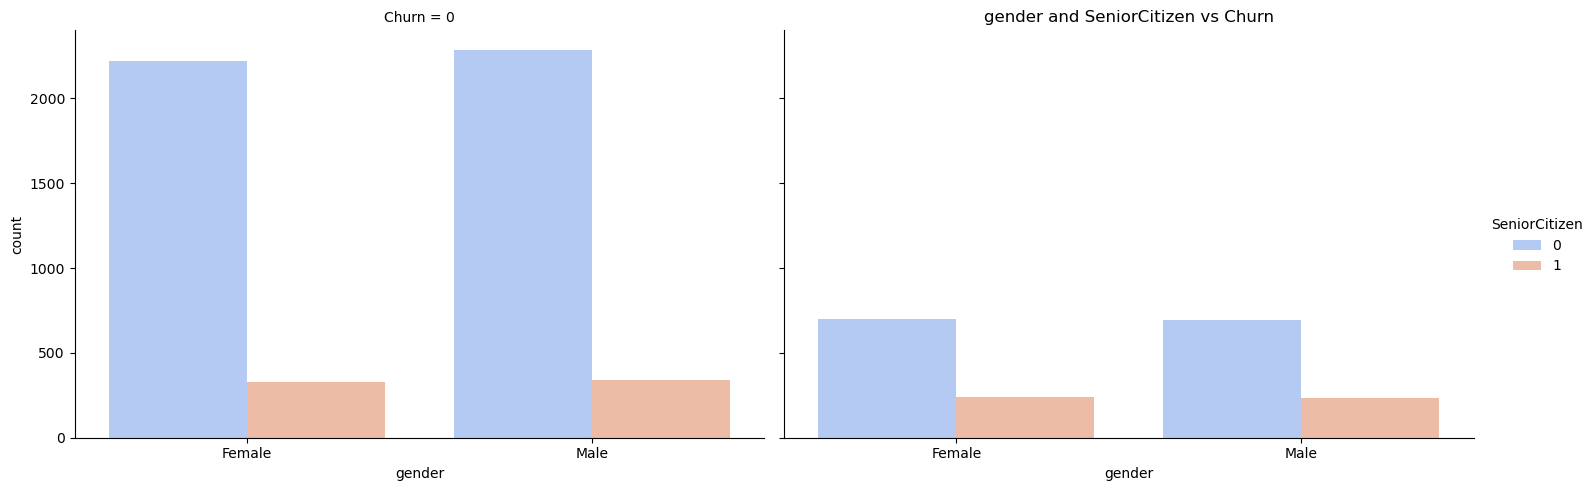

In [55]:
# Plot Multivariate Analysis for Gender and Senior Citizen vs Churn

plot_multivariate_categorical(cust_churn_data, 'gender', 'SeniorCitizen');

<Figure size 1500x2500 with 0 Axes>

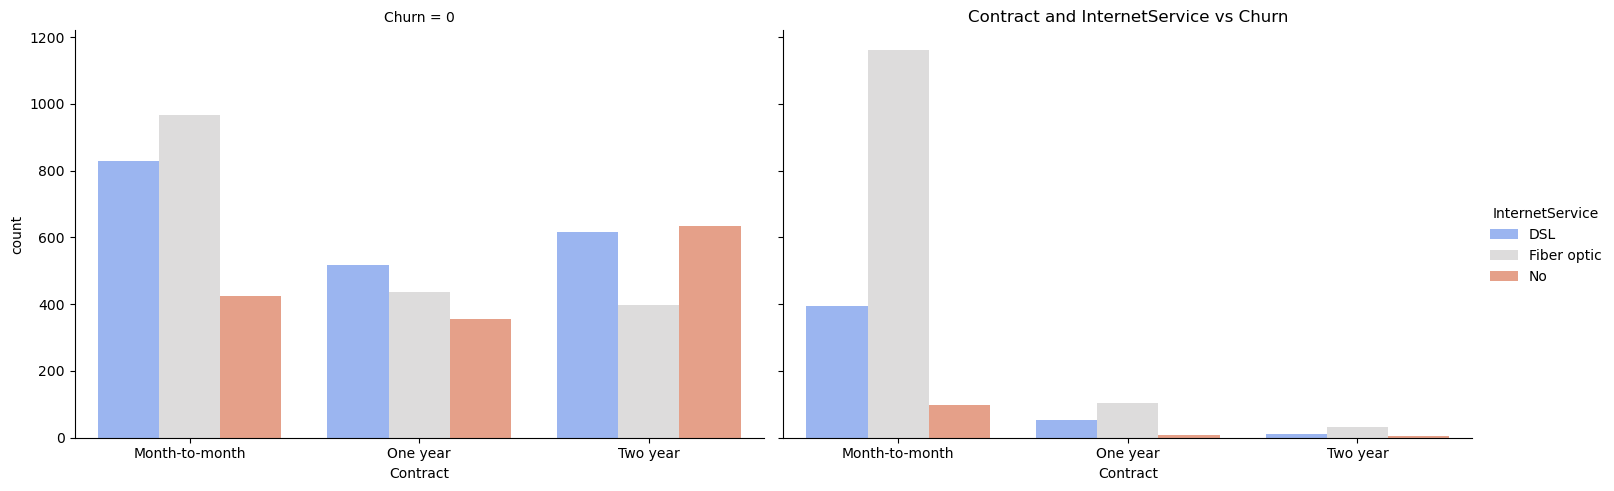

In [56]:
# Plot Multivariate Analysis for Contract and Internet Service vs Churn

plot_multivariate_categorical(cust_churn_data, 'Contract', 'InternetService');

<Figure size 1500x2500 with 0 Axes>

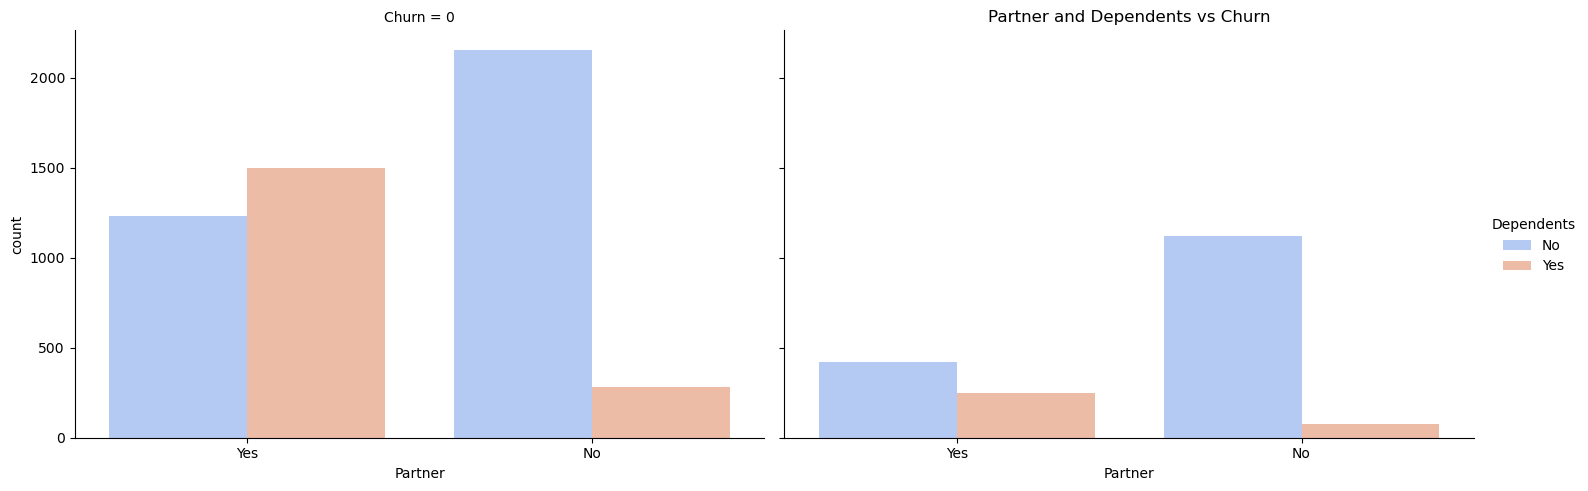

In [57]:
# Plot Multivariate Analysis for Partner and Dependents vs Churn

plot_multivariate_categorical(cust_churn_data, 'Partner', 'Dependents');

<Figure size 1500x2500 with 0 Axes>

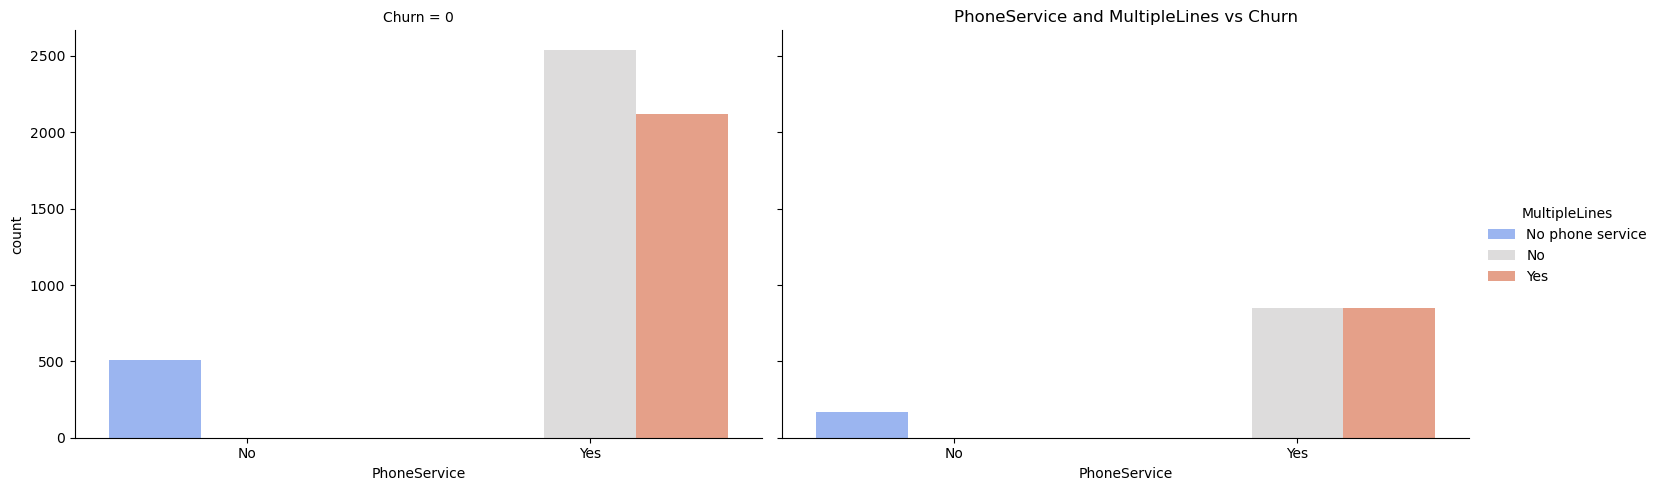

In [58]:
# Plot Multivariate Analysis for Phone Service and Multiple Lines vs Churn

plot_multivariate_categorical(cust_churn_data, 'PhoneService', 'MultipleLines');

<Figure size 1500x2500 with 0 Axes>

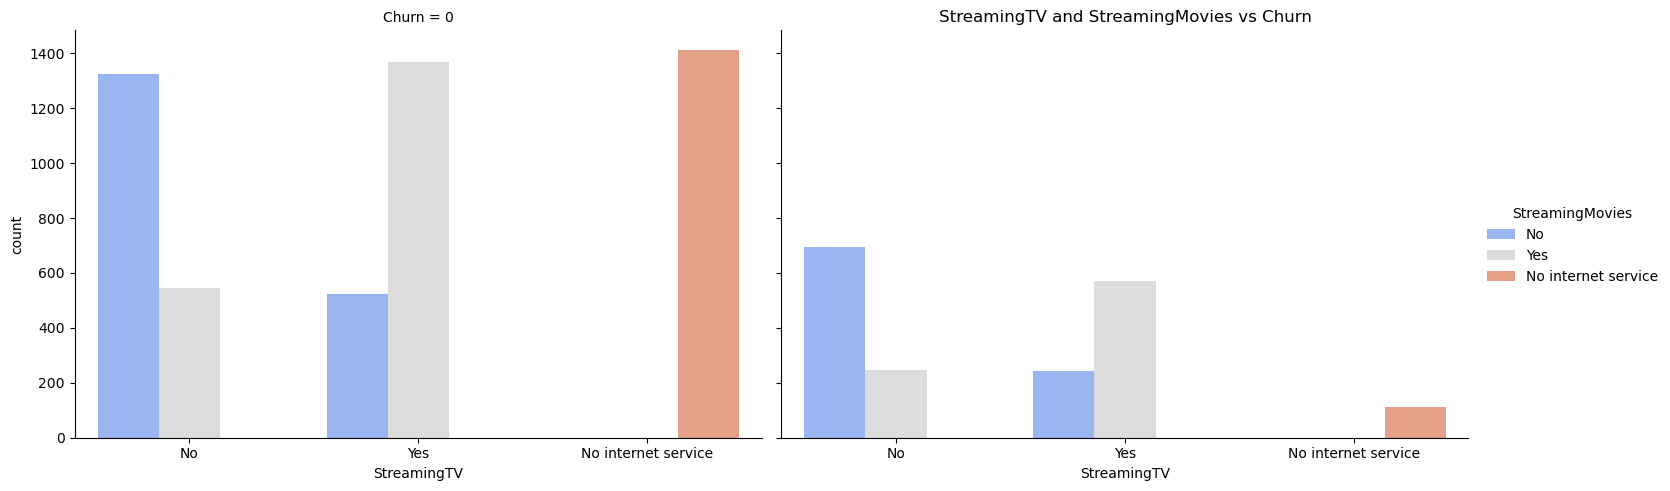

In [59]:
# Plot Multivariate Analysis for Streaming TV and Streaming Movies vs Churn

plot_multivariate_categorical(cust_churn_data, 'StreamingTV', 'StreamingMovies');

<Figure size 1500x2500 with 0 Axes>

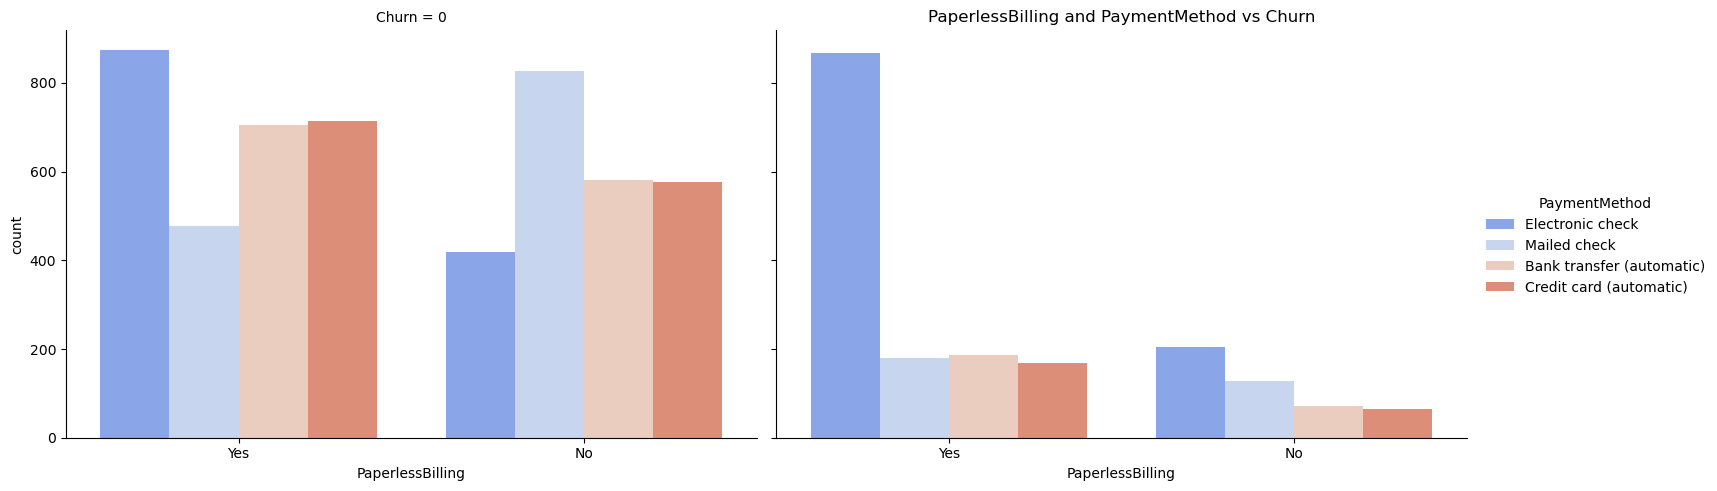

In [60]:
# Plot Multivariate Analysis for Paperless Billing and Payment Method vs Churn

plot_multivariate_categorical(cust_churn_data, 'PaperlessBilling', 'PaymentMethod');

<Figure size 1500x2500 with 0 Axes>

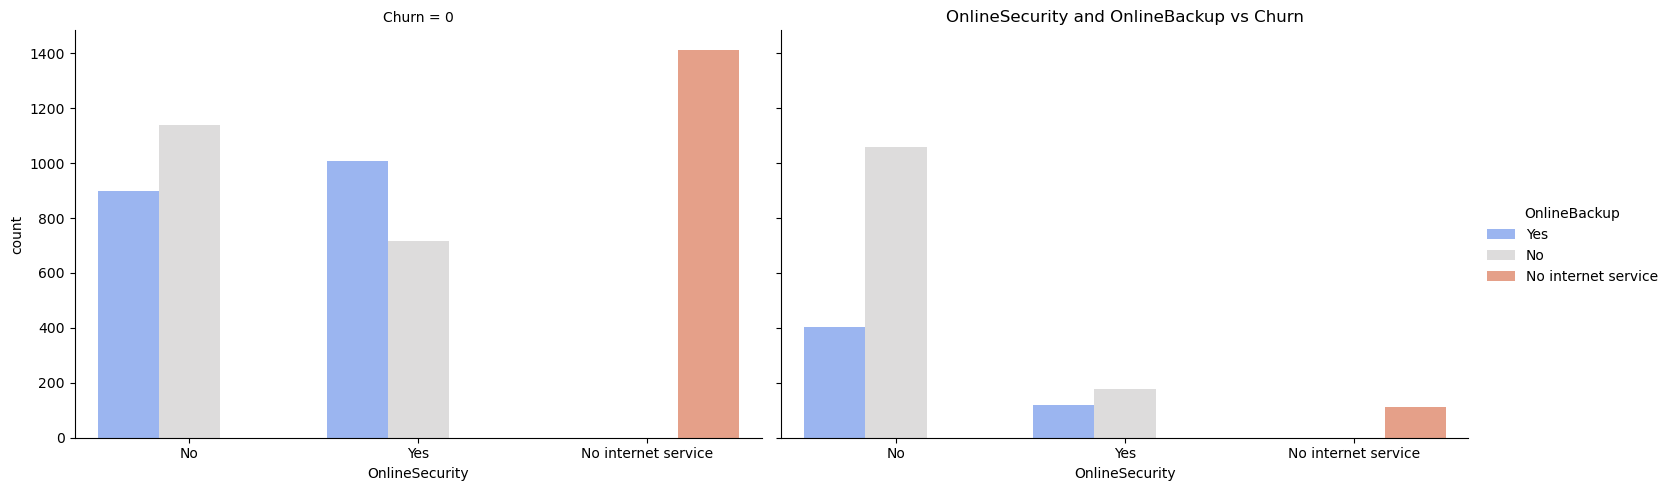

In [61]:
# Plot Multivariate Analysis for Online Security and Online Back up vs Churn

plot_multivariate_categorical(cust_churn_data, 'OnlineSecurity', 'OnlineBackup');

<Figure size 1500x2500 with 0 Axes>

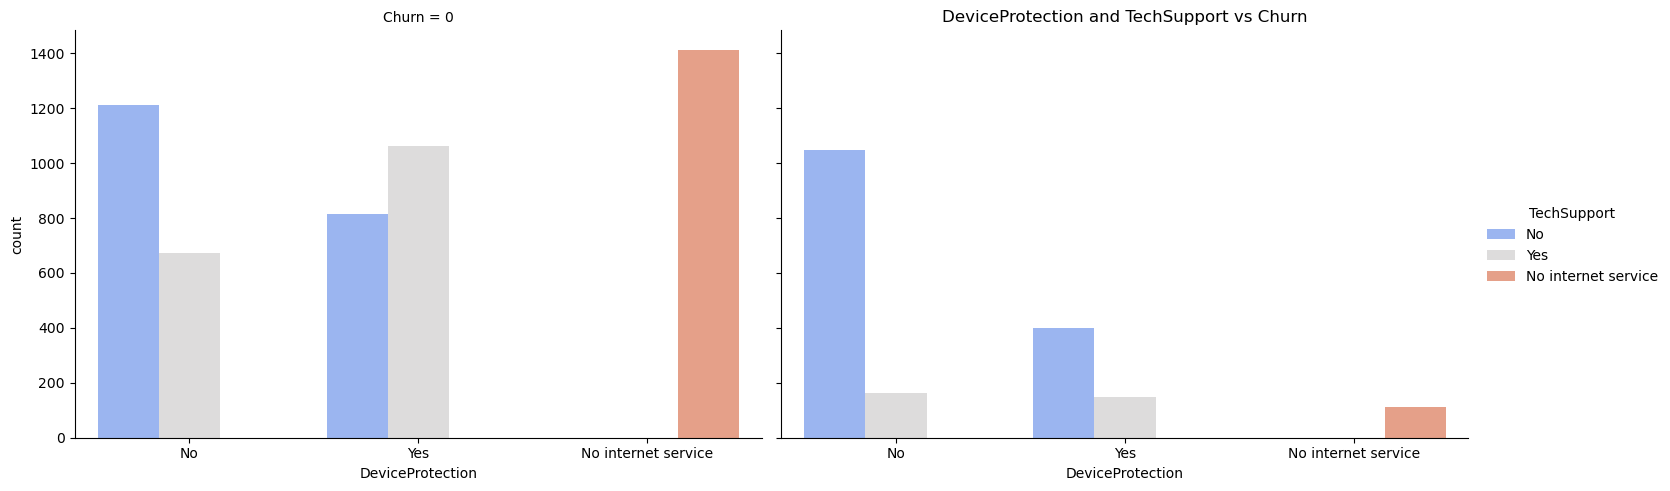

In [62]:
# Plot Multivariate Analysis for Device Protection and Tech Support vs Churn

plot_multivariate_categorical(cust_churn_data, 'DeviceProtection', 'TechSupport');